Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

Ans.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('/home/jovyan/work/flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
rows, columns = df.shape

In [5]:
rows

10683

In [6]:
columns

11

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

Ans.

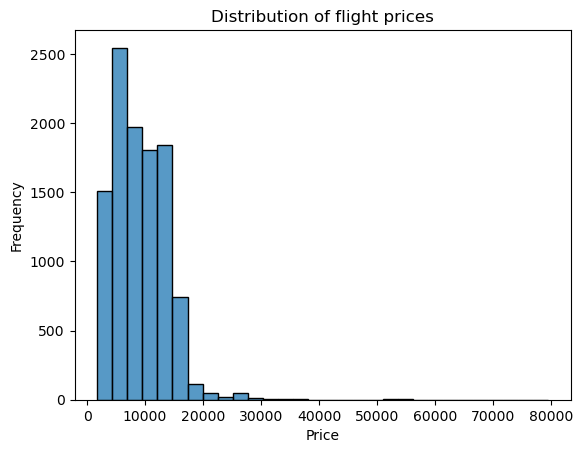

In [7]:
sns.histplot(df['Price'] ,bins = 30 ,edgecolor = 'black')
plt.title('Distribution of flight prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

Ans.

In [8]:
max = df['Price'].max()

In [9]:
max

79512

In [10]:
min = df['Price'].min()

In [11]:
min

1759

In [12]:
range = max - min

In [13]:
range

77753

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

Ans.

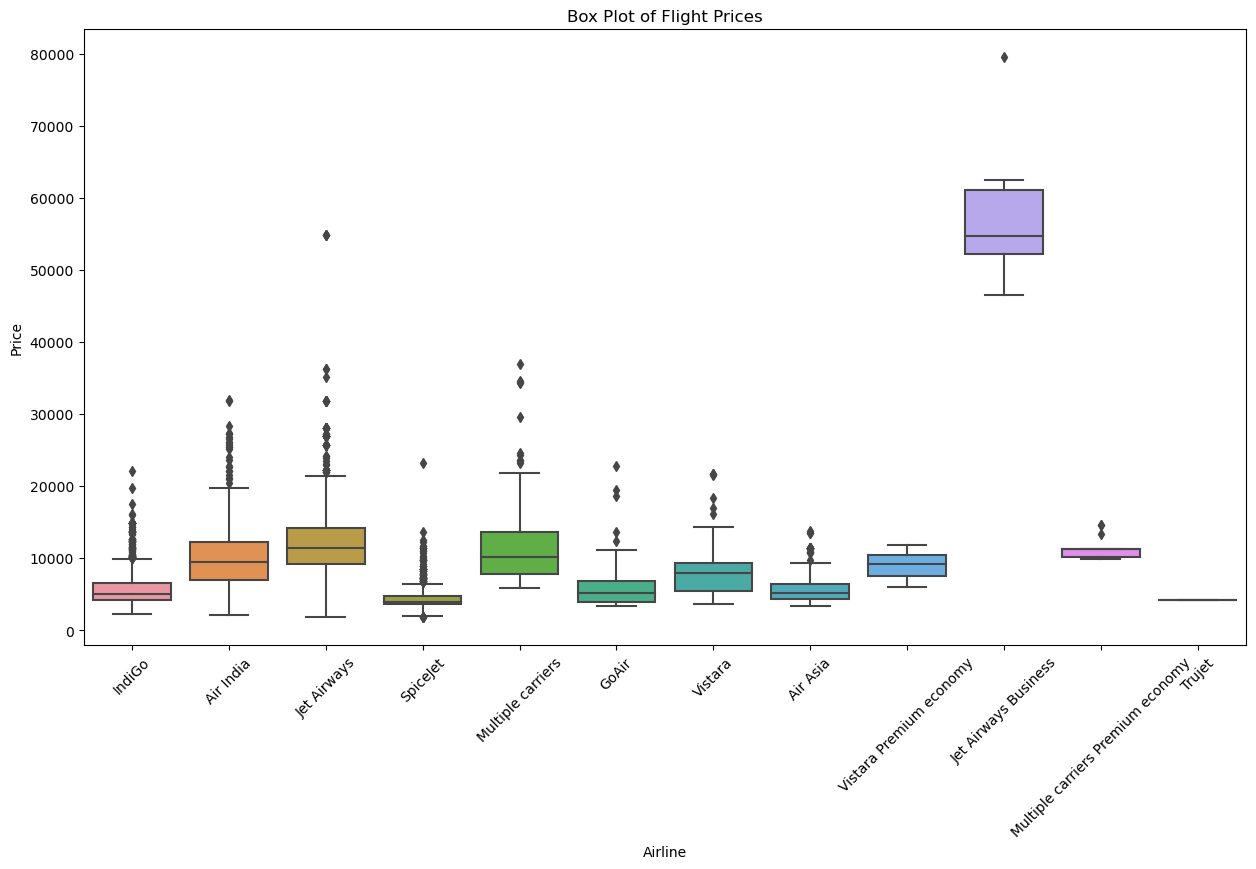

In [14]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Airline', y='Price', data=df)

# Add title and labels
plt.title('Box Plot of Flight Prices')
plt.xlabel('Airline')
plt.ylabel('Price')

plt.xticks(rotation=45)

# Show plot
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Ans. 

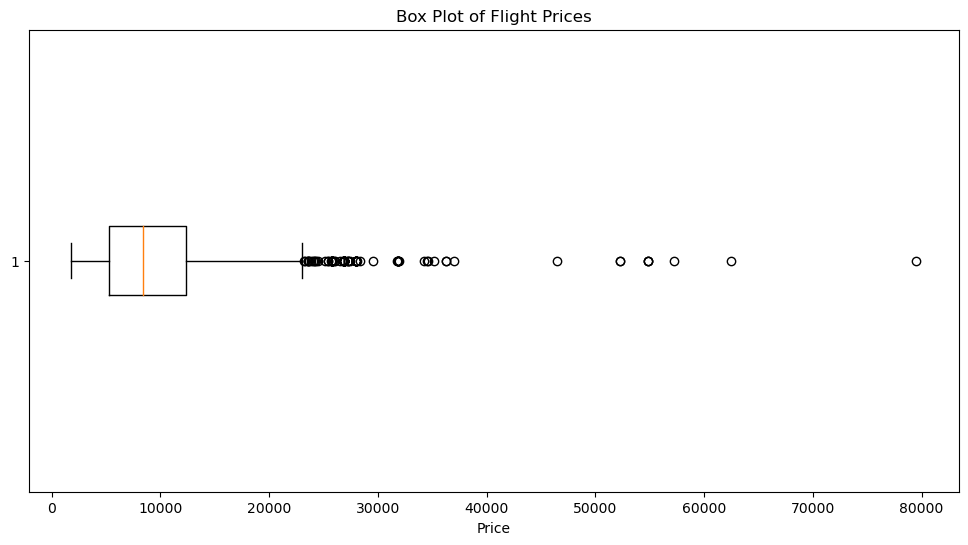

In [15]:
plt.figure(figsize=(12, 6))  # Optional: Adjust figure size
plt.boxplot(df['Price'], vert=False)

# Add title and labels
plt.title('Box Plot of Flight Prices')
plt.xlabel('Price')

# Show plot
plt.show()

Outliers can skew the distribution, affecting the mean and variance. They might indicate data issues or unique cases that should be investigated further.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

Ans. 

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [21]:
# Convert 'Date_of_Journey' to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract month and year from 'Date_of_Journey'
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year


In [22]:
# Group by month and calculate average price
monthly_avg_price = df.groupby('Month')['Price'].mean().reset_index()


TypeError: 'int' object is not callable

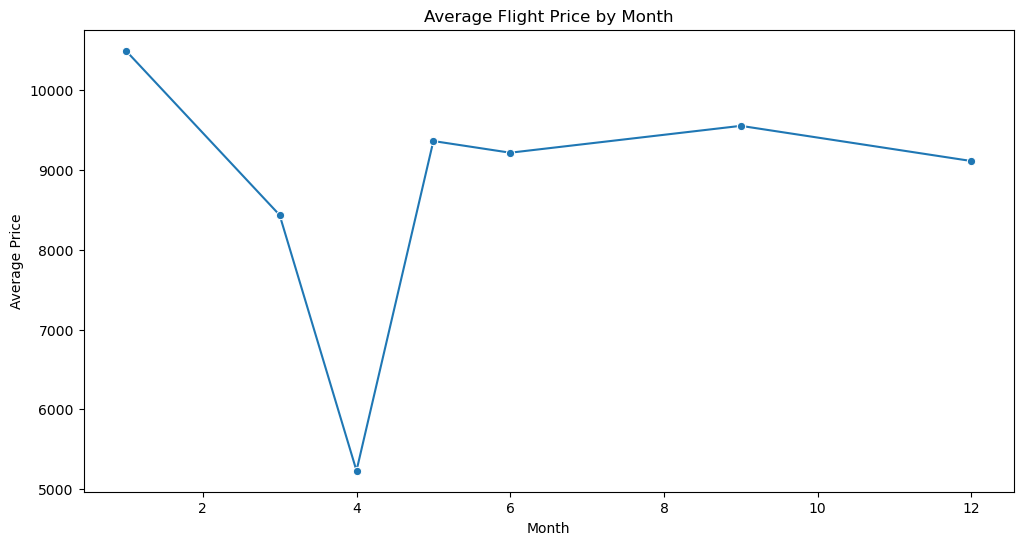

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_price, x='Month', y='Price', marker = 'o')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

Ans. 
Features to Analyze:

Date Information:

Date of Flight: To identify seasonal trends, extract month, week, and day of the week.

Booking Date: Analyze how lead time affects flight prices.

Flight Price:

Track and compare price trends over different time periods.

Destination:

Compare price trends across various destinations to see if trends differ by location.

Airline:

Examine pricing trends for different airlines to identify if certain airlines have unique trends.

Class:

Analyze how the flight class (e.g., Economy, Business) affects price trends.

Duration:

Look at how the duration of flights impacts pricing trends.Features to Analyze:

Date Information:

Date of Flight: To identify seasonal trends, extract month, week, and day of the week.

Booking Date: Analyze how lead time affects flight prices.

Flight Price:

Track and compare price trends over different time periods.

Destination:

Compare price trends across various destinations to see if trends differ by location.

Airline:

Examine pricing trends for different airlines to identify if certain airlines have unique trends.

Class:

Analyze how the flight class (e.g., Economy, Business) affects price trends.

Duration:

Look at how the duration of flights impacts pricing trends.

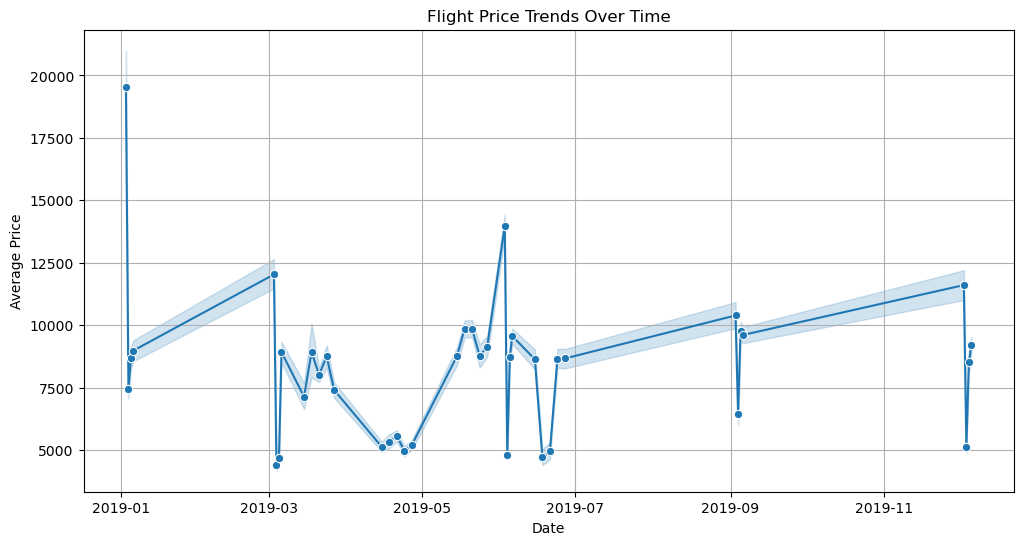

In [38]:
# Visualizations to Use:
# Time Series Analysis:

# Line Charts: Plot average flight prices over time (e.g., by month or week) to visualize trends and seasonality.

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date_of_Journey', y='Price', marker='o')
plt.title('Flight Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


TypeError: 'int' object is not callable

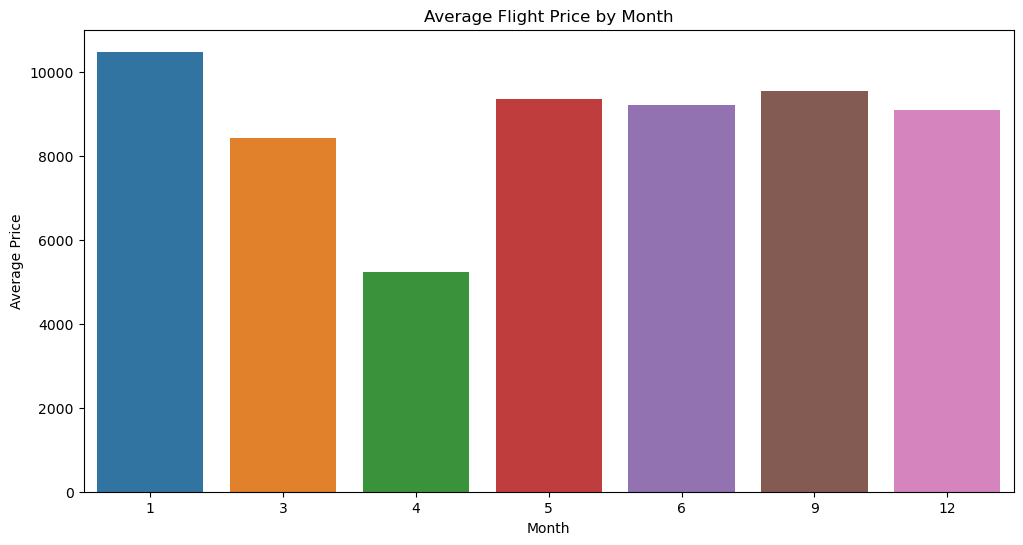

In [39]:
# Seasonal Trends:

# Monthly or Seasonal Bar Charts: Show average prices by month or season to highlight peak and off-peak periods
monthly_avg_price = df.groupby('Month')['Price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_price, x='Month', y='Price')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


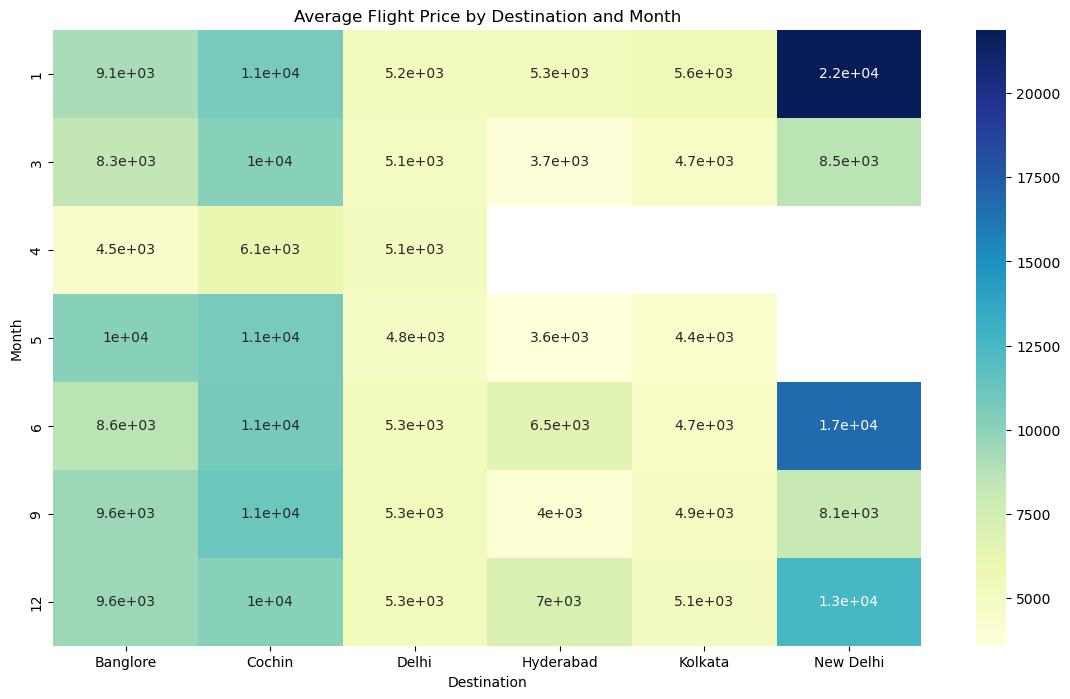

In [40]:
# Destination Comparison:

# Heatmaps: Compare average prices across different destinations and months to identify pricing trends by location.

pivot_table = df.pivot_table(values='Price', index='Month', columns='Destination', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Average Flight Price by Destination and Month')
plt.xlabel('Destination')
plt.ylabel('Month')
plt.show()


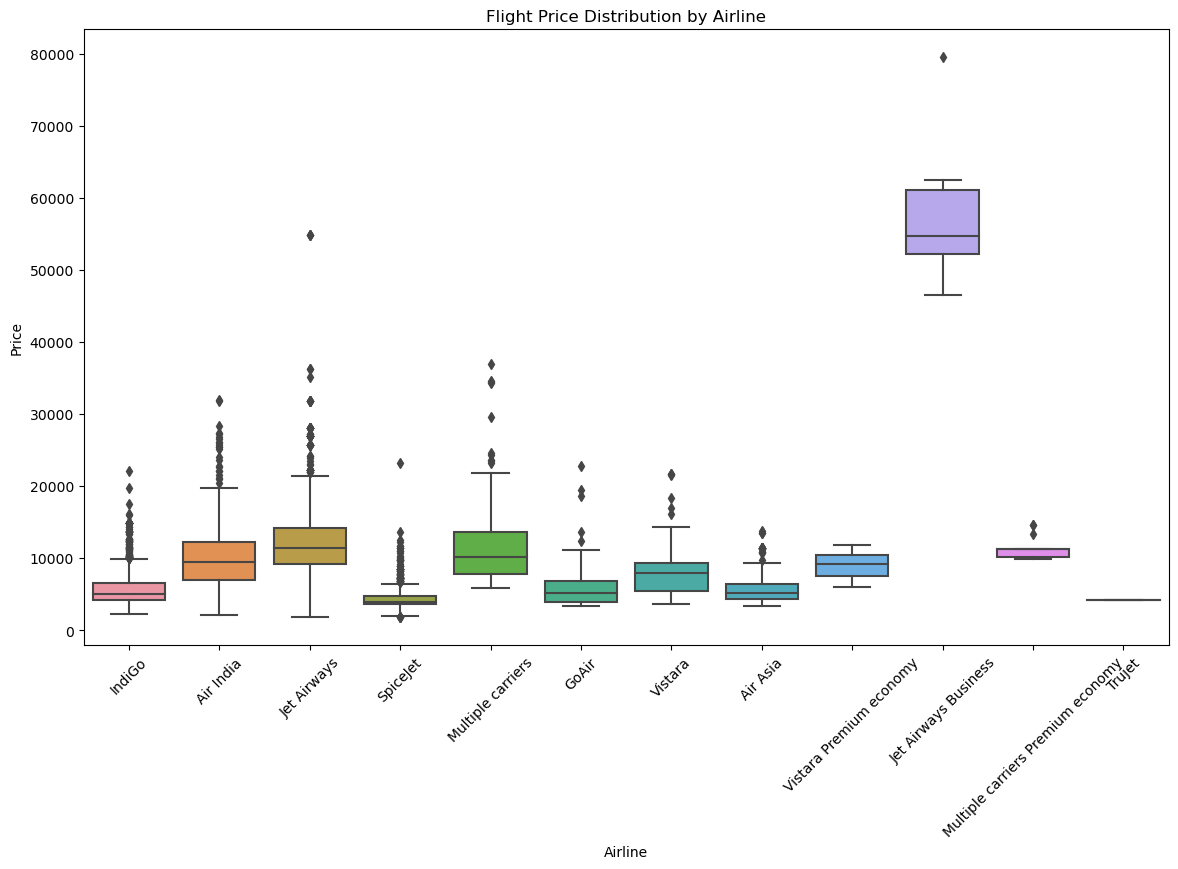

In [41]:
# Airline Analysis:

# Box Plots: Compare the distribution of flight prices across different airlines to identify pricing trends or outliers.

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Airline', y='Price')
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


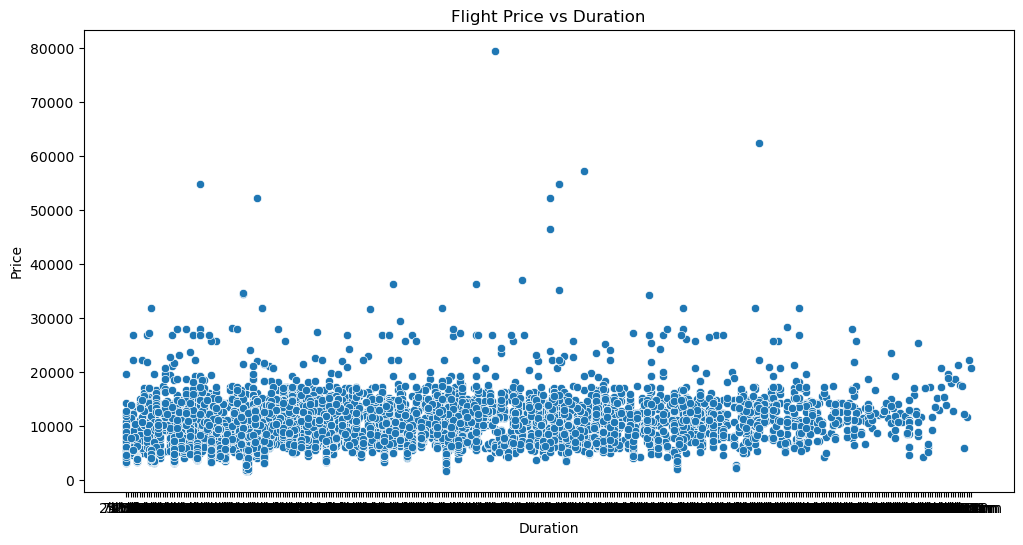

In [45]:
# Duration Analysis:

# Scatter Plots: Investigate the relationship between flight duration and price to identify any significant trends.

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Duration', y='Price')
plt.title('Flight Price vs Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


By analyzing these features and using these visualizations, we can provide a comprehensive overview of flight price trends and present actionable insights to our team.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

Ans. To identify the factors affecting flight prices in the dataset, we should analyze the following features:

Date Information: Month, day of the week, and booking lead time.

Destination: Impact of different destinations.

Airline: Pricing trends across different airlines.

Class: Differences in pricing by class (e.g., Economy, Business).

Duration: Relationship between flight duration and price.

Flight Type: Impact of direct vs. layover flights


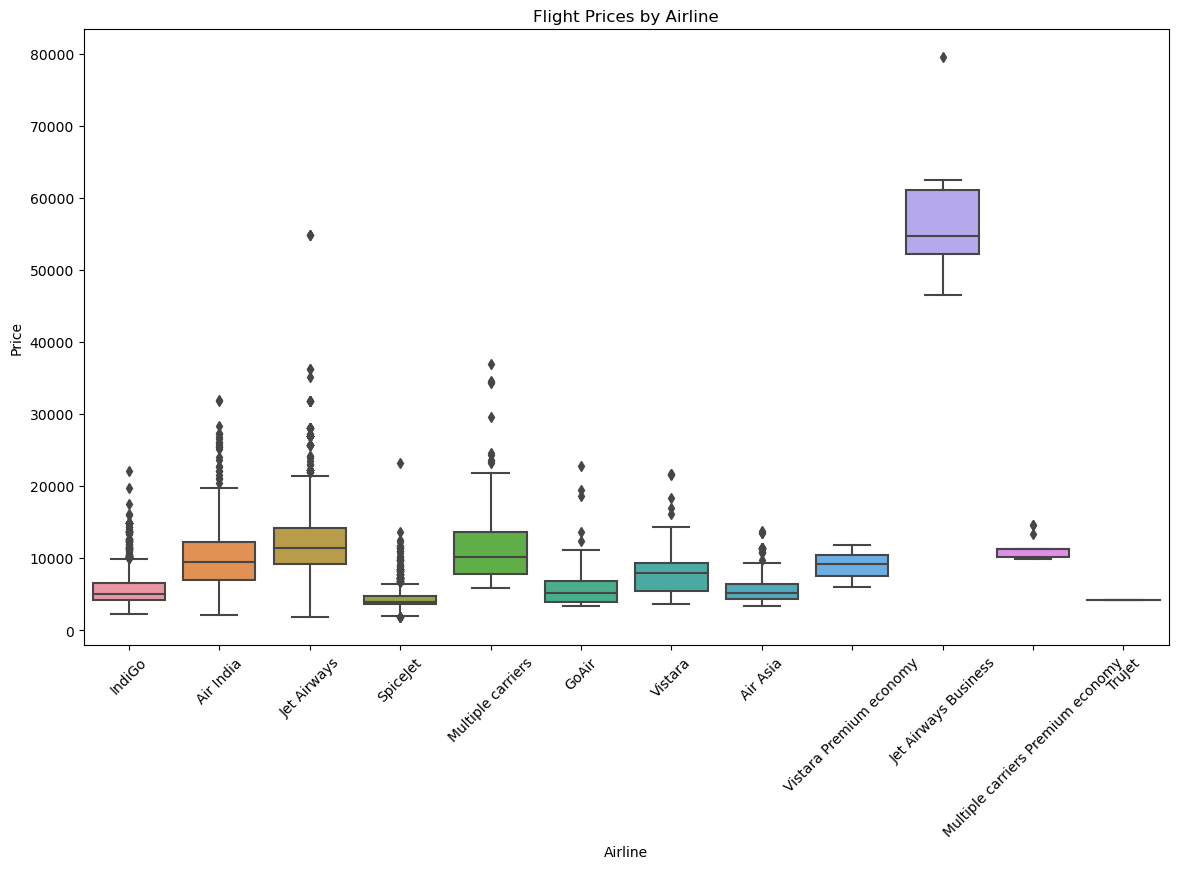

In [50]:
# Box Plot for Prices by Airline:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Airline', y='Price')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


TypeError: 'int' object is not callable

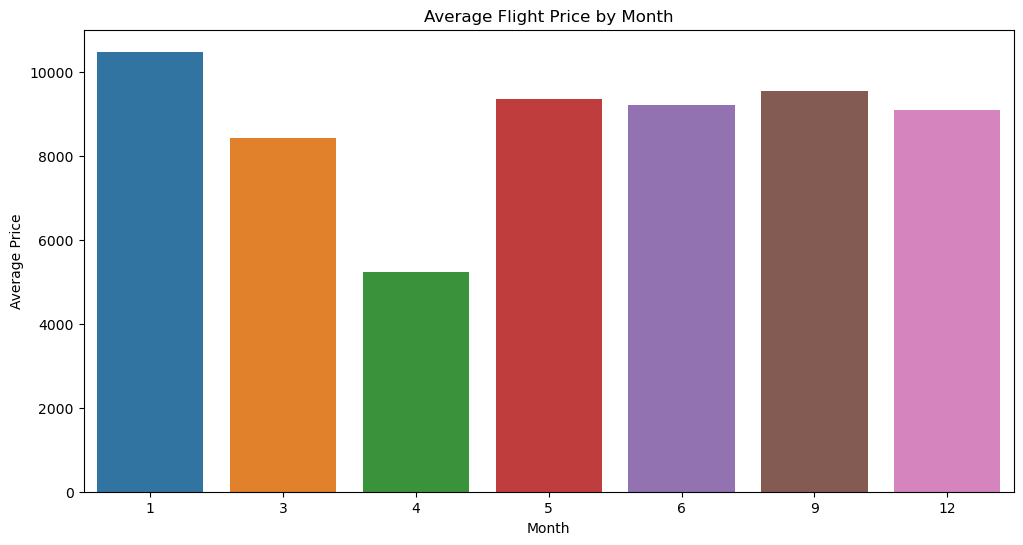

In [51]:
# Bar Chart for Average Prices by Month:

monthly_avg_price = df.groupby('Month')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_price, x='Month', y='Price')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


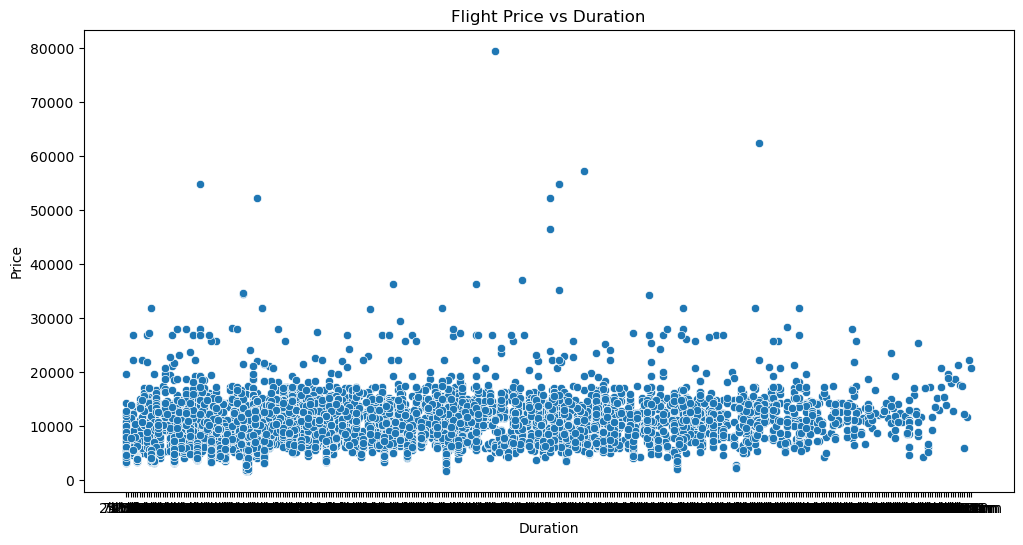

In [54]:
# Scatter Plot for Price vs. Duration:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Duration', y='Price')
plt.title('Flight Price vs Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


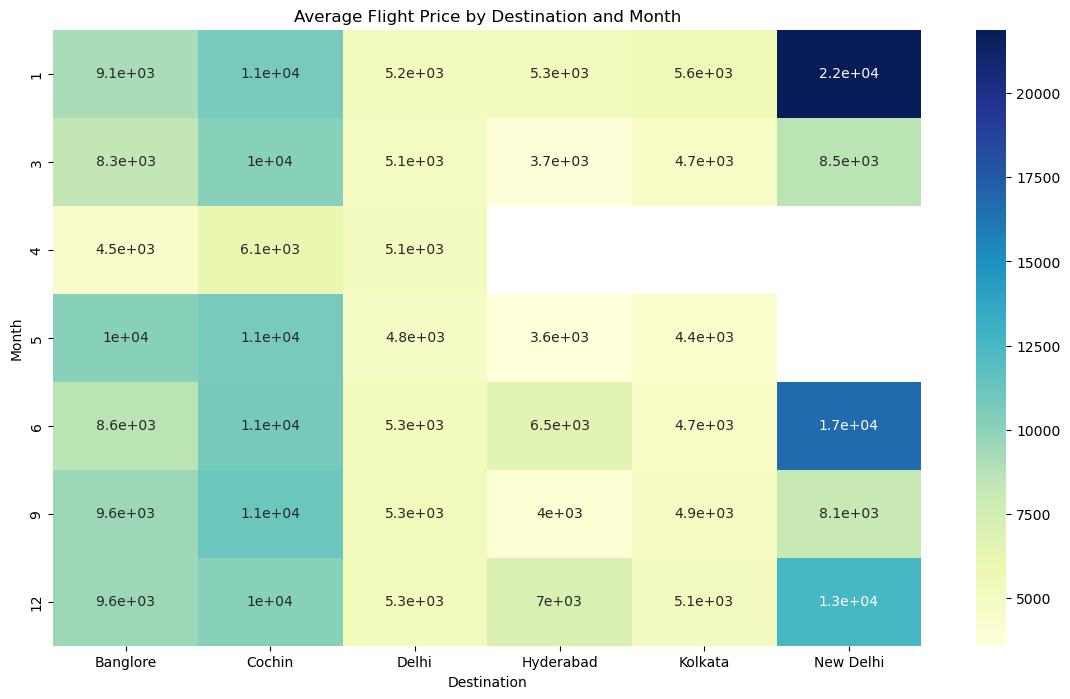

In [55]:
# Heatmap for Pricing by Destination and Month:

pivot_table = df.pivot_table(values='Price', index='Month', columns='Destination', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Average Flight Price by Destination and Month')
plt.xlabel('Destination')
plt.ylabel('Month')
plt.show()


Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

Ans. 

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
rows, columns = df.shape

In [7]:
rows

10841

In [8]:
columns

13

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [ ]:
# Convert Rating to numeric and drop rows with missing ratings
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Drop rows with missing categories
df = df.dropna(subset=['Category'])
